In [457]:
# reading data

import pandas as pd

data = pd.read_csv(r"C:\Users\KIIT\Desktop\DataTarunjeet.csv",encoding= 'unicode_escape')

data.head()

,Description of the Grievance,Category Grievance
0,concerns regarding laboratory tests being bill...,Billing/Financial Dispute
1,dassatifaction with provider,Quality Of Service
2,Dissatisafaction with delay in care.,Access And Availability
3,Dissatisafaction with Dental provider way of c...,Quality Of Service
4,Dissatisfaction for not being informed he had ...,Billing/Financial Dispute


In [458]:
data.columns = ['Description', 'Category']

data.head()

,Description,Category
0,concerns regarding laboratory tests being bill...,Billing/Financial Dispute
1,dassatifaction with provider,Quality Of Service
2,Dissatisafaction with delay in care.,Access And Availability
3,Dissatisafaction with Dental provider way of c...,Quality Of Service
4,Dissatisfaction for not being informed he had ...,Billing/Financial Dispute


In [459]:
# Dropping the missing values 

data.dropna(subset=['Category'], inplace=True)
data.dropna(subset=['Description'], inplace=True)

In [460]:
# check missing values

data.isna().sum()

Description    0
Category       0
dtype: int64

In [461]:
data.head()

,Description,Category
0,concerns regarding laboratory tests being bill...,Billing/Financial Dispute
1,dassatifaction with provider,Quality Of Service
2,Dissatisafaction with delay in care.,Access And Availability
3,Dissatisafaction with Dental provider way of c...,Quality Of Service
4,Dissatisfaction for not being informed he had ...,Billing/Financial Dispute


In [462]:
data.shape

(499, 2)

In [464]:
y = data['Category']
y

0      Billing/Financial Dispute
1             Quality Of Service
2        Access And Availability
3             Quality Of Service
4      Billing/Financial Dispute
                 ...            
516           Quality Of Service
518              Benefit Package
519              Quality Of Care
520              Quality Of Care
521      Access And Availability
Name: Category, Length: 499, dtype: object

In [465]:
data['Category'].value_counts()

Quality Of Service           160
Quality Of Care              135
Access And Availability      100
Billing/Financial Dispute     60
Benefit Package               36
Marketing                      4
Enrollment/Disenrollment       2
Confidentiality/Privacy        1
Cms Issues                     1
Name: Category, dtype: int64

<AxesSubplot:>

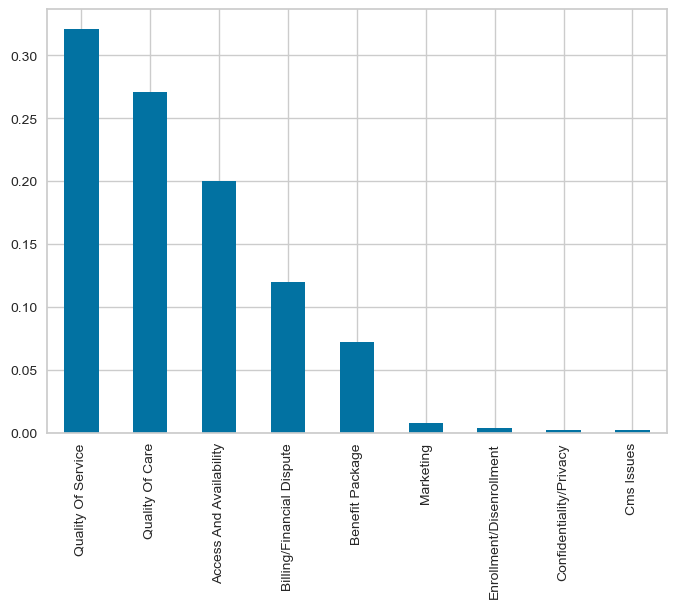

In [466]:
# check target balance
data['Category'].value_counts(normalize = True).plot.bar()

In [467]:
# text preprocessing

# download nltk

import nltk

nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[

[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nlt

True

In [468]:
d_otg = list(data['Description'])
d_otg

['concerns regarding laboratory tests being billed twice. ',
 'dassatifaction with provider',
 'Dissatisafaction with delay in care. ',
 'Dissatisafaction with Dental provider way of conducting business. ',
 'Dissatisfaction for not being informed he had dental benefit coverage. Member is requesting the Plan to write off the $78 premium balance charges.  ',
 'Dissatisfaction the quality of care she received at Paradise Valley Hospital emergency department. Member states she was taken by the police against her will after her daughter calling 911 due to suicidal thoughts she expressed to her. In her grievance member states she does  not want to pay the services and does not want the Plan to pay them since she was taken against her will. ',
 'Dissatisfaction urgent care staff advising he would have no cost share for ambulance services since the 911 call was being generated from the UC. Related appeal POSTC_2023_000238',
 'Dissatisfaction with access and delay in care. ',
 'Dissatisfaction

In [469]:
import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemz = WordNetLemmatizer()

In [470]:
corpus = []
for i in range(len(d_otg)):

    s_word = re.sub('[^a-zA-Z]', ' ', d_otg[i])

    s_word = s_word.lower()

    s_word = s_word.split()

    s_word = [word for word in s_word if word not in stopwords.words('english')]

    s_word = [lemz.lemmatize(word) for word in s_word]

    s_word = ' '.join(s_word)

    corpus.append(s_word)

In [471]:
data['Description'] = corpus
data.head()

,Description,Category
0,concern regarding laboratory test billed twice,Billing/Financial Dispute
1,dassatifaction provider,Quality Of Service
2,dissatisafaction delay care,Access And Availability
3,dissatisafaction dental provider way conductin...,Quality Of Service
4,dissatisfaction informed dental benefit covera...,Billing/Financial Dispute


In [472]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [473]:
y

array([2, 8, 0, 8, 2, 8, 2, 7, 7, 0, 0, 0, 7, 0, 0, 0, 7, 7, 0, 0, 0, 7,
       0, 8, 0, 5, 2, 0, 0, 1, 0, 1, 7, 7, 7, 7, 8, 8, 0, 0, 0, 8, 8, 8,
       0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 8, 0, 0, 8, 1, 0, 7, 0,
       0, 2, 7, 0, 0, 0, 0, 0, 0, 8, 0, 2, 0, 0, 8, 8, 2, 0, 2, 1, 2, 2,
       7, 2, 8, 2, 7, 1, 7, 2, 6, 8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 7, 0, 0,
       0, 8, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 8, 7, 2, 2,
       1, 0, 8, 2, 2, 2, 7, 0, 7, 7, 8, 8, 7, 7, 8, 7, 8, 2, 6, 8, 0, 0,
       0, 6, 0, 0, 1, 0, 7, 1, 8, 8, 2, 0, 7, 8, 8, 8, 8, 0, 7, 0, 7, 8,
       8, 0, 8, 2, 8, 8, 0, 2, 0, 8, 7, 8, 8, 0, 8, 0, 0, 0, 2, 2, 8, 7,
       0, 8, 8, 7, 7, 8, 7, 7, 7, 7, 8, 7, 8, 7, 8, 7, 7, 7, 7, 8, 8, 8,
       7, 8, 0, 7, 0, 8, 8, 8, 8, 8, 7, 8, 7, 8, 8, 2, 8, 8, 7, 0, 0, 8,
       8, 8, 8, 1, 8, 8, 8, 1, 1, 0, 2, 8, 7, 1, 8, 8, 2, 8, 7, 7, 1, 8,
       1, 1, 8, 2, 7, 8, 8, 8, 2, 8, 0, 1, 4, 2, 0, 2, 8, 8, 8, 8, 2, 8,
       1, 1, 1, 1, 1, 0, 8, 5, 8, 8, 8, 0, 7, 8, 8,

In [504]:
X = data['Description']
y = data['Category']

# train test split (80% train - 20% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=13)

print('Training Data :', X_train.shape)
print(y_train.shape)
print('Testing Data : ', X_test.shape)
print(y_test.shape)

Training Data : (399,)
(399,)
Testing Data :  (100,)
(100,)


In [505]:
# Train Bag of Words model
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv=cv.transform(X_test).toarray()
X_train_cv.shape

(399, 1366)

In [506]:
print(X_train_cv)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [513]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
from sklearn import svm
from sklearn.metrics import accuracy_score
SVM = svm.SVC(C=0.25, kernel='linear', gamma='auto')
SVM.fit(X_train_cv,y_train)
predicts=SVM.predict(X_test_cv)
print("SVM Accuracy Score -> ",accuracy_score(predicts, y_test)*100)

SVM Accuracy Score ->  57.99999999999999


In [514]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_cv,y_train)

GaussianNB()

In [515]:
y_pred = gnb.predict(X_test_cv)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.28